#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [3]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [154]:
from module_update import update, css, printmd, code_toggle

In [5]:
css()

In [155]:
code_toggle()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [136]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
%matplotlib inline

Updated file `C:\Users\yoons\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `C:\Users\yoons\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

In [11]:
%%HTML
<style>
  .skip {
     margin-bottom: 5cm;
  }
</style>

# Making networks/graphs from books

### Lars G Johnsen
### National Library of Norway  - the language bank


<div class=skip></div>


# Analytic access to texts

## Aggregated
## Corpus
## Concordances/aggregated as collocations
## Document-term matrices
## Sequential analysis
## Networks of entities

<div class=skip></div>

In [7]:
coord_name = lambda navn, tm_red: [[na for na in navn[0] if (na,) in [z[0] for z in tm_red ]]] + [list(set(na) & set([z[0] for z in tm_red])) for na in navn[1:]]

navnenettverk = lambda urn, tokener, tm: nb.make_network_name_graph(urn, coord_name(tokener, nb.token_map_to_tuples(tm)), tokenmap = nb.token_map_to_tuples(tm))

# Over half a million digitized books



## Identified by URNs.

## `URN:NBN:no-nb_digibok_2008020501024`
 


<div class=skip>

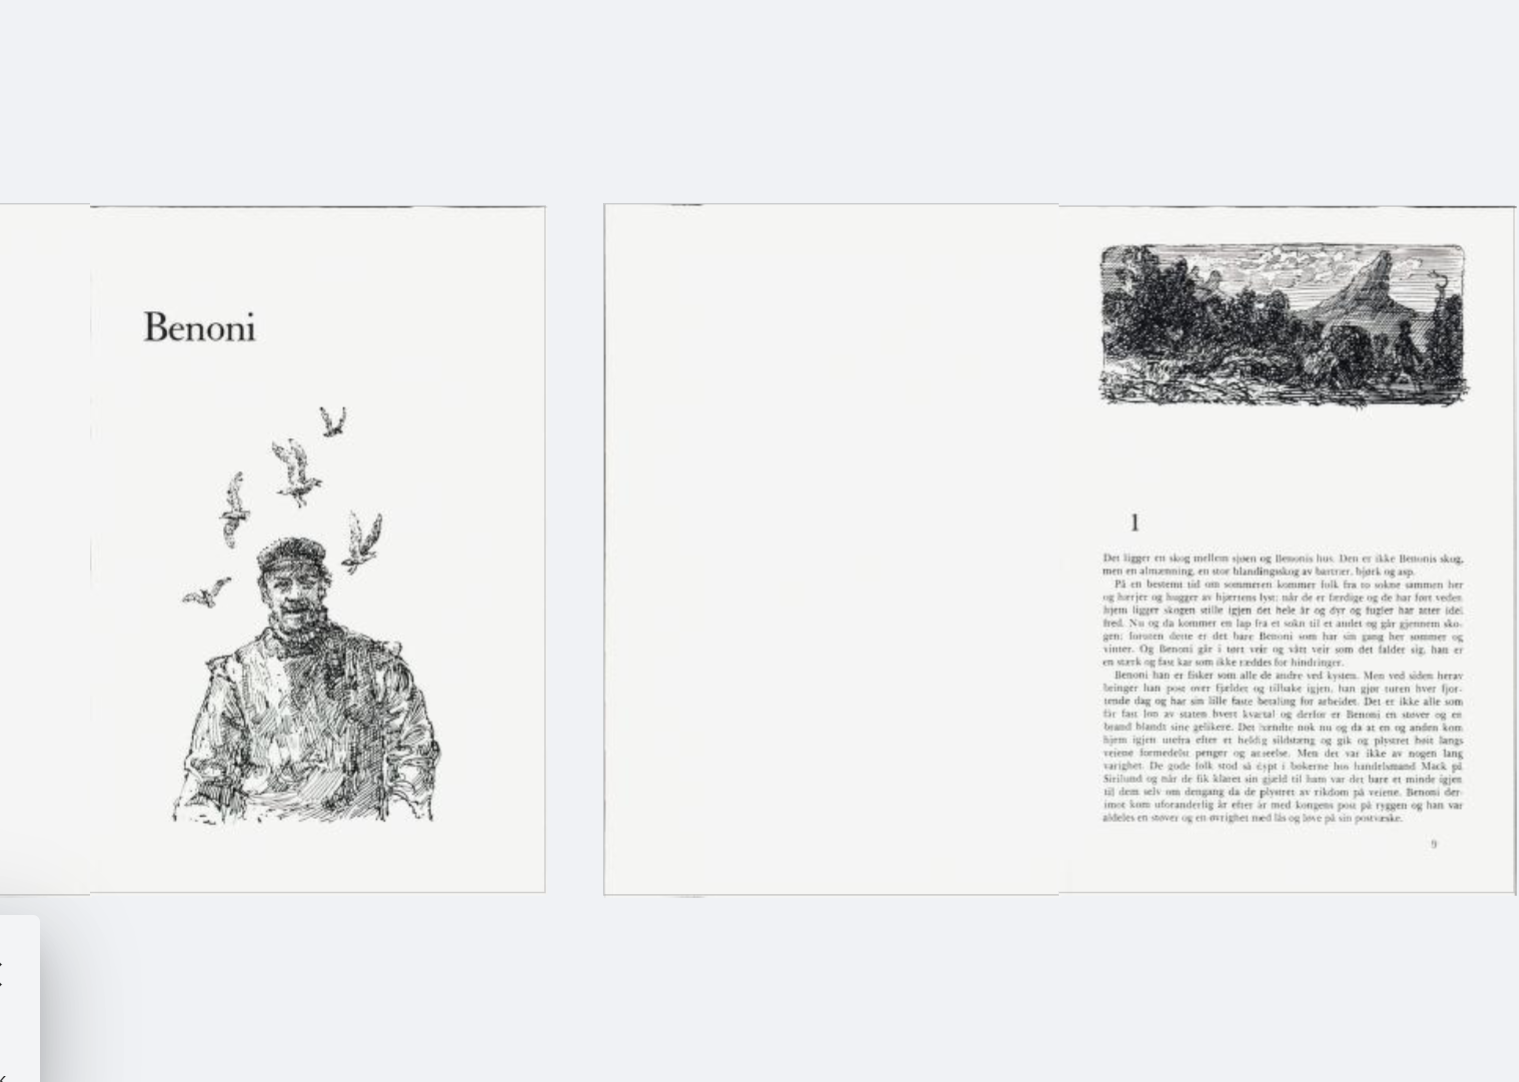

In [22]:
korpus = nb.book_urn(author='hamsun%', period=(1820, 2016), limit=1000)

In [20]:
korpus = nb.unique_urns(korpus)

<div class=skip></div>

## Example author *Hamsun*

### `korpus = nb.book_urn(author='hamsun%', period=(1820, 2016), limit=1000)`

In [23]:
nb.frame(nb.metadata(korpus), "URN Author Year Title Publisher language trans".split()).head(10)

,URN,Author,Year,Title,Publisher,language,trans
0,2009061903032,"Hamsun, Knut",1909,Vandrer spiller med Sordin,Gyldendal,nob,
1,2012021308115,"Hamsun, Knut",1988,Livsfragmenter,Gyldendal,nob,
2,2008123010003,"Hamsun, Knut",1895,Ved Rigets Port,Philipsen,nob,
3,2010111208120,"Hamsun, Knut",1990,Victoria,Gyldendal,nob,
4,2011112108059,"Hamsun, Knut",1954,Pan,Gyldendal,nob,
5,2010080620010,"Hamsun, Knut",1997,Samlede verker,"Gyldendal;[Oslo] : Gyldendal, 1997",nob,
6,2009042313001,"Hamsun, Knut",1889,Lars Oftedal,Litleré,nob,
7,2008091701031,"Hamsun, Knut",1998,August,Gyldendal,nob,
8,2007110801032,"Hamsun, Knut",1990,Segen der Erde,Deutscher Taschenbuch Verlag,ger,nob
9,2012022008038,"Hamsun, Knut",1957,Paa gjengrodde stier,Gyldendal,nob,


# Ask for a concordance

## Contexts for word *Benoni* in book "Benoni og Rosa"

### `urn_concordance(word = 'Mack', urns = 2008020501024, before = 10, after = 10, size = 20)`

In [39]:
nb.urn_concordance(word = 'Mack', urns = 2008020501024, before = 10, after = 10, size = 20)

"Benoni ; Rosa, Hamsun, Knut, 1994",De gode folk stod så dypt i bøkerne hos handelsmand,Mack,på Sirilund og når de fik klaret sin gjæld til
"Benoni ; Rosa, Hamsun, Knut, 1994",ikke av med dem her . Ta dem med til,Mack,på Sirilund .
"Benoni ; Rosa, Hamsun, Knut, 1994",Si,Mack,"fra mig , at blåræv står i otte , ti"
"Benoni ; Rosa, Hamsun, Knut, 1994",Når handelsmand,Mack,på Sirilund vilde gjøre et eller andet godt eller ondt
"Benoni ; Rosa, Hamsun, Knut, 1994",var både sort og hvit . Han liknet sin bror,Mack,på Rosengaard deri at han kunde gjøre hvad han vilde
"Benoni ; Rosa, Hamsun, Knut, 1994",Nu sendte,Mack,bud til Benoni om å indfinde sig på Sirilund straks
"Benoni ; Rosa, Hamsun, Knut, 1994",der sålænge og kræmtet og stelte sig godt istand at,Mack,selv hørte ham der ute og åpnet døren med et
"Benoni ; Rosa, Hamsun, Knut, 1994",Nå — kom ind ! sa selve,Mack,.
"Benoni ; Rosa, Hamsun, Knut, 1994",på ham om han vilde opreise eller nedstyrte Benoni .,Mack,sa :
"Benoni ; Rosa, Hamsun, Knut, 1994","andre har båret sig like så dårlig ad , sa",Mack,.
"Benoni ; Rosa, Hamsun, Knut, 1994","Du skal kjøpe sild for dem , sa",Mack,". Her er sild like utenfor din dør , du"


<div class=skip></div>

# Aggregated data

## `nb.get_freq(2008020501024)`


In [65]:
nb.frame(nb.get_freq(2008020501024), '2008020501024').head(10)

,2008020501024
.,7075
og,5093
",",4846
det,2716
han,2488
jeg,2185
i,2093
var,2088
til,2003
ikke,1968


<div class=skip></div>

# Generating Structured data from texts

### Networks of words or characters, entitities

<div class=skip></div>

# Strategies for retrieving entities

## Annotation of text versus offline annotation


### Benoni, Benoni Hartvigsen, Hartvigsen, Benonis, Benoni Hartvigsens, Hartvigsens



In [69]:
book = 2008020501024

In [78]:
navn = nb.names(book, cutoff=13)

# Single names

In [84]:
one = nb.frame(navn[0], 'one')
one.head(20)

,one
Arentsen,159
Arn,22
Aron,29
Barfod,24
Barnefar,33
Benoni,796
Benonis,37
Bergen,40
Bramaputra,41
Dem,99


In [85]:
two = nb.frame({' '.join(x): navn[1][x] for x in navn[1]}, 'two')
two.head(20)

,two
Arentsen Rosa,1
Benoni Hartvigsen,21
Rosa Barfod,7
Ole Menneske,36
Fredrik Mensa,45
Edvarda Mack,3
Nikolai Arentsen,22
Rosa Svend,1
Hugh Trevelyan,17
Benoni Mack,1


In [89]:
combo = one.join(two, how='outer')

# What strings may refer to `Benoni`?

In [100]:
printmd('## ' + ' \n\n## '.join([x for x in combo.index if 'Benoni' in x or 'Hartvigsen' in x or 'Benonis' in x or 'Hartvigsens' in x]))

## Benoni 

## Benoni Hartvigsen 

## Benoni Hartvigsens 

## Benoni Mack 

## Benonis 

## Hartvigsen 

## Hartvigsens 

## Mack Benoni

In [101]:
navneliste = nb.token_map(navn, strings=True)

# Names - identifier to left of `==>`

In [105]:
printmd( '## ' + '\n\n## '.join([x for x in navneliste if 'Rosa' in x or 'Benoni' in x]))

## Arentsen ==> Arentsen_Rosa

## Barfod ==> Rosa_Barfod

## Benoni ==> Benoni_Hartvigsen

## Benonis ==> Benoni_Hartvigsen

## Hartvigsen ==> Benoni_Hartvigsen

## Hartvigsens ==> Benoni_Hartvigsen

## Rosa ==> Arentsen_Rosa

## Rosas ==> Arentsen_Rosa

## Svend ==> Rosa_Svend

## Arentsen_Rosa ==> Arentsen_Rosa

## Benoni_Hartvigsen ==> Benoni_Hartvigsen

## Rosa_Barfod ==> Rosa_Barfod

## Rosa_Svend ==> Rosa_Svend

## Benoni_Mack ==> Benoni_Mack

## Mack_Benoni ==> Benoni_Mack

## Benoni_Hartvigsens ==> Benoni_Hartvigsen

In [121]:
printmd('## ' + '\n\n## '.join("""Arentsen ==> Arentsen_Rosa
~~Barfod ==> Rosa_Barfod~~
**Barfod ==> Rosa_**
Benoni ==> Benoni_Hartvigsen
Benonis ==> Benoni_Hartvigsen
Hartvigsen ==> Benoni_Hartvigsen
Hartvigsens ==> Benoni_Hartvigsen
~~Rosa ==> Arentsen_Rosa~~
**Rosa ==> Rosa_**
~~Rosas ==> Arentsen_Rosa~~
**Rosas ==> Rosa_**
~~Svend ==> Rosa_Svend~~
~~Arentsen_Rosa ==> Arentsen_Rosa~~ 
Benoni_Hartvigsen ==> Benoni_Hartvigsen
~~Rosa_Barfod ==> Rosa_Barfod~~
**Rosa_Barfod ==> Rosa_**
~~Rosa_Svend ==> Rosa_Svend~~
~~Benoni_Mack ==> Benoni_Mack~~
~~Mack_Benoni ==> Benoni_Mack~~
Benoni_Hartvigsens ==> Benoni_Hartvigsen
""".split('\n')))

## Arentsen ==> Arentsen_Rosa

## ~~Barfod ==> Rosa_Barfod~~

## **Barfod ==> Rosa_**

## Benoni ==> Benoni_Hartvigsen

## Benonis ==> Benoni_Hartvigsen

## Hartvigsen ==> Benoni_Hartvigsen

## Hartvigsens ==> Benoni_Hartvigsen

## ~~Rosa ==> Arentsen_Rosa~~

## **Rosa ==> Rosa_**

## ~~Rosas ==> Arentsen_Rosa~~

## **Rosas ==> Rosa_**

## ~~Svend ==> Rosa_Svend~~

## ~~Arentsen_Rosa ==> Arentsen_Rosa~~ 

## Benoni_Hartvigsen ==> Benoni_Hartvigsen

## ~~Rosa_Barfod ==> Rosa_Barfod~~

## **Rosa_Barfod ==> Rosa_**

## ~~Rosa_Svend ==> Rosa_Svend~~

## ~~Benoni_Mack ==> Benoni_Mack~~

## ~~Mack_Benoni ==> Benoni_Mack~~

## Benoni_Hartvigsens ==> Benoni_Hartvigsen

## 

In [122]:
navneliste

['Arentsen ==> Arentsen_Rosa',
 'Arn ==> Arn',
 'Aron ==> Aron',
 'Barfod ==> Rosa_Barfod',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_Hartvigsen',
 'Benonis ==> Benoni_Hartvigsen',
 'Bergen ==> Bergen',
 'Bramaputra ==> Bramaputra',
 'Dem ==> Dem',
 'Deres ==> Deres',
 'Dokker ==> Dokker',
 'Dokkers ==> Dokker',
 'Edvarda ==> Edvarda_Mack',
 'Ellen ==> Ellen',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 'Gud ==> Gud',
 'Guds ==> Gud',
 'Hartvigsen ==> Benoni_Hartvigsen',
 'Hartvigsens ==> Benoni_Hartvigsen',
 'Hopan ==> Hopan',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 'Jerusalem ==> Jerusalem',
 'Levion ==> Levion',
 'Lofoten ==> Lofoten',
 'Mack ==> Edvarda_Mack',
 'Macks ==> Edvarda_Mack',
 'Marelius ==> Marelius',
 'Margrete ==> Margrete',
 'Martha ==> Martha',
 'Menneske ==> Ole_Menneske',
 'Mensa ==> Fredrik_Mensa',
 'Mons ==> Mons',
 'Munken ==> Munken_Vendt',
 'Nikolai ==> Nikolai_Arentsen',
 'Ole =

In [123]:
navn_redigert = [
    #'Arentsen ==> Arentsen_Rosa',
 'Arn ==> Arn',
 'Aron ==> Aron',
 'Barfod ==> Rosa_Barfod',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_Hartvigsen',
 'Benonis ==> Benoni_Hartvigsen',
 #'Bergen ==> Bergen',
 #'Bramaputra ==> Bramaputra',
 #'Dem ==> Dem',
 #'Deres ==> Deres',
 #'Dokker ==> Dokker',
 #'Dokkers ==> Dokker',
 'Edvarda ==> Edvarda',
 'Ellen ==> Ellen',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 #'Gud ==> Gud',
 #'Guds ==> Gud',
 'Hartvigsen ==> Benoni_Hartvigsen',
 'Hartvigsens ==> Benoni_Hartvigsen',
 #'Hopan ==> Hopan',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 #'Jerusalem ==> Jerusalem',
 #'Levion ==> Levion',
 #'Lofoten ==> Lofoten',
 'Mack ==> Mack_',
 'Macks ==> Mack_',
 'Marelius ==> Marelius',
 'Margrete ==> Margrete',
 'Martha ==> Martha',
 'Menneske ==> Ole_Menneske',
 'Mensa ==> Fredrik_Mensa',
 'Mons ==> Mons',
 'Munken ==> Munken_Vendt',
 'Nikolai ==> Nikolai_Arentsen',
 'Ole ==> Ole_Menneske',
 #'Overkroppen ==> Overkroppen',
 'Petrine ==> Petrine',
 'Rosa ==> Rosa_Barfod',
 'Rosas ==> Rosa_Barfod',
 'Schøning ==> Schøning',
 'Sir ==> Sir_Hugh_Trevelyan',
 #'Sirilund ==> Sirilund',
 'Sorosi ==> Sorosi',
 'Steen ==> Steen',
 #'Svend ==> Rosa_Svend',
 'Torpelviken ==> Torpelviken',
 'Trevelyan ==> Sir_Hugh_Trevelyan',
 'Vendt ==> Munken_Vendt',
 #'Arentsen_Rosa ==> Arentsen_Rosa',
 'Benoni_Hartvigsen ==> Benoni_Hartvigsen',
 'Rosa_Barfod ==> Rosa_Barfod',
 'Ole_Menneske ==> Ole_Menneske',
 'Fredrik_Mensa ==> Fredrik_Mensa',
 'Edvarda_Mack ==> Edvarda_Mack',
 'Nikolai_Arentsen ==> Nikolai_Arentsen',
 'Rosa_Svend ==> Rosa_Svend',
 'Hugh_Trevelyan ==> Sir_Hugh_Trevelyan',
 #'Benoni_Mack ==> Benoni_Mack',
 'Sir_Hugh ==> Sir_Hugh_Trevelyan',
 #'Mack_Benoni ==> Benoni_Mack',
 'Munken_Vendt ==> Munken_Vendt',
 'Benoni_Hartvigsens ==> Benoni_Hartvigsen',
 'Jens_Barnefar ==> Jens_Barnefar',
 #'Mack_Svend ==> Mack_Svend',
 'Sir_Hugh_Trevelyan ==> Sir_Hugh_Trevelyan']

In [124]:
navn_redigert

['Arn ==> Arn',
 'Aron ==> Aron',
 'Barfod ==> Rosa_Barfod',
 'Barnefar ==> Jens_Barnefar',
 'Benoni ==> Benoni_Hartvigsen',
 'Benonis ==> Benoni_Hartvigsen',
 'Edvarda ==> Edvarda',
 'Ellen ==> Ellen',
 'Fredrik ==> Fredrik_Mensa',
 'Funtus ==> Funtus',
 'Gilbert ==> Gilbert',
 'Glahn ==> Glahn',
 'Hartvigsen ==> Benoni_Hartvigsen',
 'Hartvigsens ==> Benoni_Hartvigsen',
 'Hugh ==> Sir_Hugh_Trevelyan',
 'Jens ==> Jens_Barnefar',
 'Mack ==> Mack_',
 'Macks ==> Mack_',
 'Marelius ==> Marelius',
 'Margrete ==> Margrete',
 'Martha ==> Martha',
 'Menneske ==> Ole_Menneske',
 'Mensa ==> Fredrik_Mensa',
 'Mons ==> Mons',
 'Munken ==> Munken_Vendt',
 'Nikolai ==> Nikolai_Arentsen',
 'Ole ==> Ole_Menneske',
 'Petrine ==> Petrine',
 'Rosa ==> Rosa_Barfod',
 'Rosas ==> Rosa_Barfod',
 'Schøning ==> Schøning',
 'Sir ==> Sir_Hugh_Trevelyan',
 'Sorosi ==> Sorosi',
 'Steen ==> Steen',
 'Torpelviken ==> Torpelviken',
 'Trevelyan ==> Sir_Hugh_Trevelyan',
 'Vendt ==> Munken_Vendt',
 'Benoni_Hartvigsen ==

# Create the networks - cooccurence within a paragraph

In [125]:
G_redigert = navnenettverk(book, navn, navn_redigert)

In [126]:
G_default = nb.make_network_name_graph(book, navn)

NodeView(('Arentsen_Rosa', 'Aron', 'Benoni_Hartvigsen', 'Bergen', 'Dem', 'Deres', 'Dokker', 'Edvarda_Mack', 'Ellen', 'Funtus', 'Gilbert', 'Gud', 'Hopan', 'Levion', 'Lofoten', 'Marelius', 'Martha', 'Munken_Vendt', 'Nikolai_Arentsen', 'Ole_Menneske', 'Rosa_Barfod', 'Rosa_Svend', 'Sir_Hugh_Trevelyan', 'Sirilund', 'Steen', 'Torpelviken', 'Arn', 'Bramaputra', 'Fredrik_Mensa', 'Glahn', 'Jens_Barnefar', 'Jerusalem', 'Petrine', 'Schøning', 'Overkroppen', 'Margrete', 'Mons'))

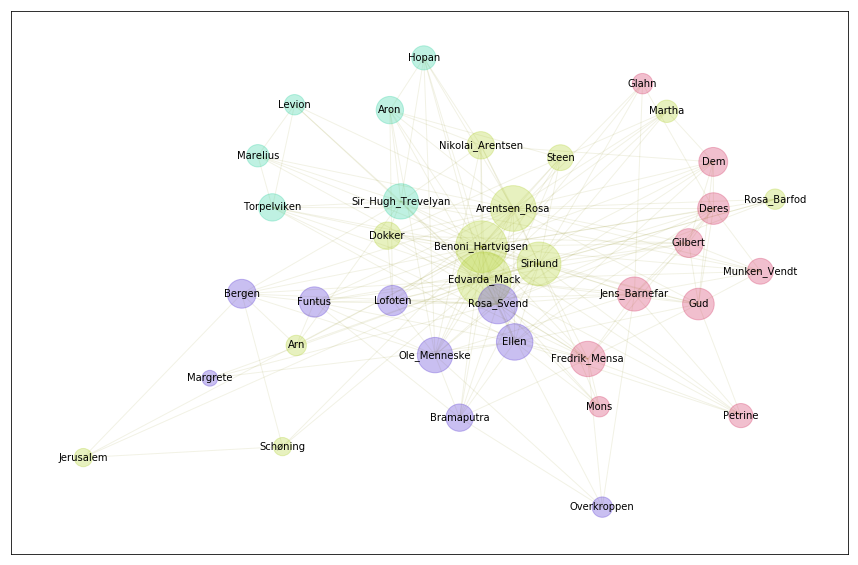

In [137]:
gnl.show_graph(G_default)

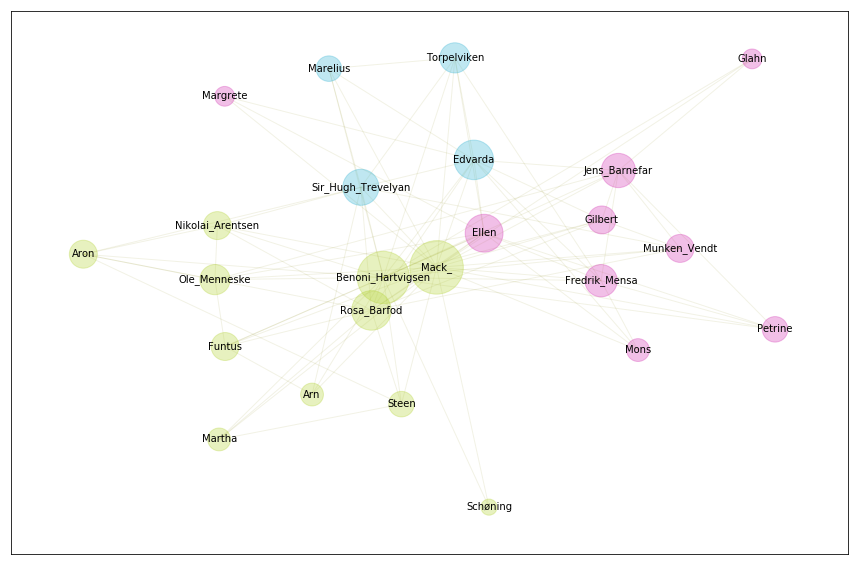

In [138]:
gnl.show_graph(G_redigert)

In [151]:
def print_communities(G):
    Gc = gnl.community_dict(G)
    for c in Gc:
        printmd('## ' + c + ' : ' + ' '.join(Gc[c]))
        

In [152]:
print_communities(G_redigert)

## Mack_-Benoni_Hartvigsen : Mack_ Benoni_Hartvigsen Rosa_Barfod Ole_Menneske Nikolai_Arentsen Aron Funtus Steen Martha Arn Schøning

## Edvarda-Sir_Hugh_Trevelyan : Edvarda Sir_Hugh_Trevelyan Torpelviken Marelius

## Ellen-Jens_Barnefar : Ellen Jens_Barnefar Fredrik_Mensa Gilbert Munken_Vendt Petrine Mons Margrete Glahn

In [153]:
print_communities(G_default)

## Edvarda_Mack-Benoni_Hartvigsen : Edvarda_Mack Benoni_Hartvigsen Arentsen_Rosa Sirilund Dokker Nikolai_Arentsen Steen Martha Rosa_Barfod Arn Jerusalem Schøning

## Sir_Hugh_Trevelyan-Torpelviken : Sir_Hugh_Trevelyan Torpelviken Aron Hopan Marelius Levion

## Rosa_Svend-Ellen : Rosa_Svend Ellen Ole_Menneske Lofoten Funtus Bergen Bramaputra Overkroppen Margrete

## Fredrik_Mensa-Jens_Barnefar : Fredrik_Mensa Jens_Barnefar Deres Gud Gilbert Dem Munken_Vendt Petrine Mons Glahn